 ### Difference between TP and TN vs. FP and FN

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, lit, count

# Initialize Spark session
spark = SparkSession.builder.appName("ConfusionMatrix").getOrCreate()

# Example data: Actual labels and predicted labels
data = [
    (0, 0),  # TN
    (1, 1),  # TP
    (0, 1),  # FP
    (1, 0),  # FN
    (1, 1),  # TP
    (0, 0),  # TN
    (0, 0),  # TN
    (1, 1)   # TP
]

# Create a DataFrame with two columns: actual and predicted labels
df = spark.createDataFrame(data, ["actual", "predicted"])

# Calculate True Positives (TP)
tp = df.filter((col("actual") == 1) & (col("predicted") == 1)).count()

# Calculate True Negatives (TN)
tn = df.filter((col("actual") == 0) & (col("predicted") == 0)).count()

# Show the results
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")


StatementMeta(, 0358738a-1cf2-412d-841c-38ff0aa913c3, 3, Finished, Available, Finished)

True Positives (TP): 3
True Negatives (TN): 3


### Explanation:

- True Positive (TP): The code filters rows where both the actual and predicted columns are 1 (positive). This gives the count of true positives.
- True Negative (TN): The code filters rows where both the actual and predicted columns are 0 (negative). This gives the count of true negatives.

### Another example

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Initialize Spark session
spark = SparkSession.builder.appName("ConfusionMatrixExample").getOrCreate()

# Example data: Actual and predicted labels
data = [
    (0, 0),  # TN (True Negative)
    (1, 1),  # TP (True Positive)
    (0, 1),  # FP (False Positive)
    (1, 0),  # FN (False Negative)
    (1, 1),  # TP (True Positive)
    (0, 0),  # TN (True Negative)
    (1, 0),  # FN (False Negative)
    (0, 1)   # FP (False Positive)
]

# Create a DataFrame with two columns: actual and predicted labels
df = spark.createDataFrame(data, ["actual", "predicted"])

# Add a new column to classify each record into TP, TN, FP, or FN
df = df.withColumn(
    "category", 
    when((col("actual") == 1) & (col("predicted") == 1), "TP")   # True Positive
    .when((col("actual") == 0) & (col("predicted") == 0), "TN")  # True Negative
    .when((col("actual") == 0) & (col("predicted") == 1), "FP")  # False Positive
    .when((col("actual") == 1) & (col("predicted") == 0), "FN")  # False Negative
)

# Show the results
df.show()

# Count the instances of each category
confusion_matrix = df.groupBy("category").count().orderBy("category")
confusion_matrix.show()



StatementMeta(, 0358738a-1cf2-412d-841c-38ff0aa913c3, 4, Finished, Available, Finished)

+------+---------+--------+
|actual|predicted|category|
+------+---------+--------+
|     0|        0|      TN|
|     1|        1|      TP|
|     0|        1|      FP|
|     1|        0|      FN|
|     1|        1|      TP|
|     0|        0|      TN|
|     1|        0|      FN|
|     0|        1|      FP|
+------+---------+--------+

+--------+-----+
|category|count|
+--------+-----+
|      FN|    2|
|      FP|    2|
|      TN|    2|
|      TP|    2|
+--------+-----+



StatementMeta(, 0358738a-1cf2-412d-841c-38ff0aa913c3, 6, Finished, Available, Finished)

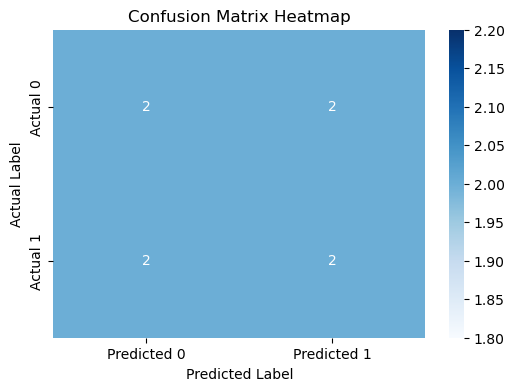

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrix data
# Rows = Actual, Columns = Predicted
confusion_matrix_data = np.array([
    [2, 2],  # First row: TN, FP
    [2, 2]   # Second row: FN, TP
])

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add titles and labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the heatmap
plt.show()


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Initialize Spark session
spark = SparkSession.builder.appName("FP_FN_Example").getOrCreate()

# Data for two different problems
data_cancer_detection = [
    # actual, predicted
    (1, 0),  # FN (False Negative: Missed cancer diagnosis)
    (0, 1),  # FP (False Positive: Healthy patient diagnosed as cancer)
    (1, 1),  # TP (True Positive: Correct cancer diagnosis)
    (0, 0)   # TN (True Negative: Correct non-cancer diagnosis)
]

data_spam_detection = [
    # actual, predicted
    (1, 0),  # FN (False Negative: Missed spam email)
    (0, 1),  # FP (False Positive: Legit email marked as spam)
    (1, 1),  # TP (True Positive: Correct spam detection)
    (0, 0)   # TN (True Negative: Correct non-spam detection)
]

# Create DataFrames
df_cancer = spark.createDataFrame(data_cancer_detection, ["actual", "predicted"])
df_spam = spark.createDataFrame(data_spam_detection, ["actual", "predicted"])

# Classify rows as TP, TN, FP, or FN for both problems
df_cancer = df_cancer.withColumn(
    "category", 
    when((col("actual") == 1) & (col("predicted") == 1), "TP")
    .when((col("actual") == 0) & (col("predicted") == 0), "TN")
    .when((col("actual") == 0) & (col("predicted") == 1), "FP")
    .when((col("actual") == 1) & (col("predicted") == 0), "FN")
)

df_spam = df_spam.withColumn(
    "category", 
    when((col("actual") == 1) & (col("predicted") == 1), "TP")
    .when((col("actual") == 0) & (col("predicted") == 0), "TN")
    .when((col("actual") == 0) & (col("predicted") == 1), "FP")
    .when((col("actual") == 1) & (col("predicted") == 0), "FN")
)

# Count occurrences of each category for cancer detection
confusion_matrix_cancer = df_cancer.groupBy("category").count()
confusion_matrix_cancer.show()

# Count occurrences of each category for spam detection
confusion_matrix_spam = df_spam.groupBy("category").count()
confusion_matrix_spam.show()


StatementMeta(, 0358738a-1cf2-412d-841c-38ff0aa913c3, 7, Finished, Available, Finished)

+--------+-----+
|category|count|
+--------+-----+
|      FN|    1|
|      FP|    1|
|      TP|    1|
|      TN|    1|
+--------+-----+

+--------+-----+
|category|count|
+--------+-----+
|      FN|    1|
|      FP|    1|
|      TP|    1|
|      TN|    1|
+--------+-----+



## Analysis of the Impact:

### Cancer Detection (Serious FN):
- False Negative (FN): If the model misses a cancer diagnosis (FN), it can delay life-saving treatment, which can be extremely dangerous. This is why in medical applications, we often prioritize minimizing False Negatives.
- False Positive (FP): A false cancer diagnosis (FP) can cause anxiety, stress, and may lead to unnecessary testing, but it is less harmful than a False Negative.

### Spam Detection (Serious FP):
- False Positive (FP): If a legitimate email (e.g., job offer or bill) is marked as spam (FP), it could be missed by the user, potentially leading to serious issues. This makes False Positives more critical in this case.
- False Negative (FN): If a spam email is missed (FN) and lands in the inbox, it might be a bit annoying, but it doesn't have serious consequences.

### Conclusion:

- In medical applications, False Negatives (FN) are usually more harmful, as missing a critical diagnosis can endanger someone's health.
- In spam detection, False Positives (FP) are more harmful because marking important legitimate emails as spam can lead to missed opportunities or critical information.

These examples show how the importance of FP and FN can shift based on the domain, and why it's crucial to evaluate models not just on accuracy, but also on the specific needs of the application.